In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering,KMeans
import warnings
warnings.filterwarnings('ignore')

In [5]:
x, y = make_blobs (
    n_samples = 30,
    centers = 3,
    cluster_std = 1.0,
    random_state = 42
)

In [6]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [7]:
linkage_matrix = linkage(x_scaled, method = 'ward')

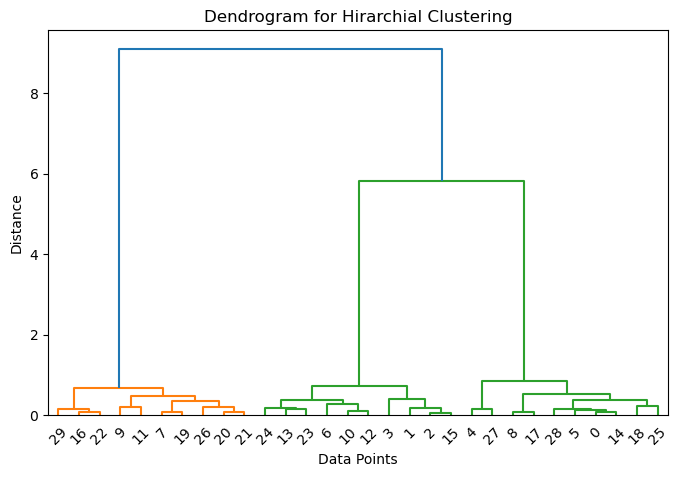

In [14]:
plt.figure(figsize=(8,5))
dendrogram(linkage_matrix)
plt.title("Dendrogram for Hirarchial Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [28]:
agg_model = AgglomerativeClustering(
    n_clusters=3, 
    metric='euclidean',
    linkage='ward'
)
agg_labels = agg_model.fit_predict(x_scaled)

In [29]:
print("Cluster Labels:", agg_labels)

Cluster Labels: [0 2 2 2 0 0 2 1 0 1 2 1 2 2 0 2 1 0 0 1 1 1 1 2 2 0 1 0 0 1]


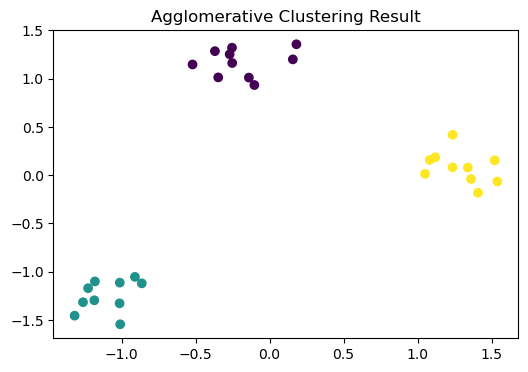

In [40]:
plt.figure(figsize=(6,4))
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=agg_labels)
plt.title("Agglomerative Clustering Result")
plt.show()

In [37]:
kmeans_1 = KMeans(n_clusters = 2, random_state = 42)
labels_level_1 = kmeans_1.fit_predict(x_scaled)

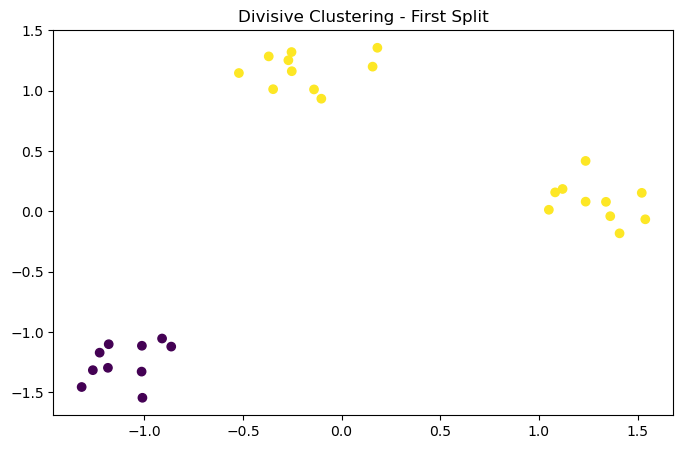

In [41]:
plt.figure(figsize=(8,5))
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c = labels_level_1)
plt.title("Divisive Clustering - First Split")
plt.show()

In [50]:
# selecting a cluster and splitting it further
cluster_0 = x_scaled[labels_level_1 == 0]

kmeans_2 = KMeans(n_clusters = 2, random_state = 42)
labels_level_2 =kmeans_2.fit_predict(cluster_0)

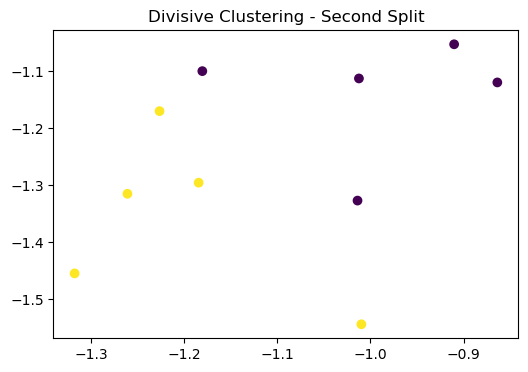

In [51]:
plt.figure(figsize=(6,4))
plt.scatter(cluster_0[:, 0], cluster_0[:, 1], c = labels_level_2)
plt.title("Divisive Clustering - Second Split")
plt.show()